Find the best two EMA parameters for the following strategy: Buy if STO RSI < 0.8 and an ascending EMA crossover occurs; sell if STO RSI > 0.2 and a descending EMA crossover occurs. On BTC/USDT pair. Timeframe 2H.

In [2]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
from math import ceil
from IPython.display import clear_output

client=Client(tld='us')

klinesT = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "15 March 2020", '2022-06-16')
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

In [37]:
del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])
#print(df)

In [38]:
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')

del df['timestamp']
print(df)

                         open      high       low     close        volume
timestamp                                                                
2020-03-15 00:00:00   5172.68   5268.54   5101.05   5157.74   13.92430000
2020-03-15 04:00:00   5178.30   5320.66   5178.30   5274.93    6.67378300
2020-03-15 08:00:00   5256.66   5489.97   5219.12   5429.43   20.10975000
2020-03-15 12:00:00   5444.07   5584.84   5248.47   5318.12   24.46370100
2020-03-15 16:00:00   5325.00   5391.27   5254.12   5325.18   26.59941100
...                       ...       ...       ...       ...           ...
2022-06-15 08:00:00  20706.97  21280.29  20107.35  21176.03  395.67334700
2022-06-15 12:00:00  21148.54  21772.25  21056.39  21417.47  216.46954300
2022-06-15 16:00:00  21410.17  22410.58  20246.02  21634.10  714.84695300
2022-06-15 20:00:00  21623.66  22784.93  21455.65  22594.59  185.79303400
2022-06-16 00:00:00  22573.55  22991.02  22166.89  22216.02  112.89212200

[4934 rows x 5 columns]


In [39]:
dfTest = df.copy()
dfTest = dfTest[:]
dfTest['STOCH_RSI']=ta.momentum.stochrsi_d(dfTest['close'], window=14, smooth1=3, smooth2=3)
dfTest['rsi'] = ta.momentum.rsi(dfTest['close'], window=14)
dfTest

,open,high,low,close,volume,STOCH_RSI,rsi
timestamp,,,,,,,
2020-03-15 00:00:00,5172.68,5268.54,5101.05,5157.74,13.92430000,NaN,NaN
2020-03-15 04:00:00,5178.30,5320.66,5178.30,5274.93,6.67378300,NaN,NaN
2020-03-15 08:00:00,5256.66,5489.97,5219.12,5429.43,20.10975000,NaN,NaN
2020-03-15 12:00:00,5444.07,5584.84,5248.47,5318.12,24.46370100,NaN,NaN
2020-03-15 16:00:00,5325.00,5391.27,5254.12,5325.18,26.59941100,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-15 08:00:00,20706.97,21280.29,20107.35,21176.03,395.67334700,0.654093,25.529925
2022-06-15 12:00:00,21148.54,21772.25,21056.39,21417.47,216.46954300,0.713660,28.104711
2022-06-15 16:00:00,21410.17,22410.58,20246.02,21634.10,714.84695300,0.822630,30.428955


Focus on Bear Market: From 15 November 2021 to 15 June 2022

Loading... 64 / 64
     i   j      result
62  17  16  491.722382
54  16  16  491.722382
46  15  16  491.722382
38  14  16  491.722382
24  13  10  493.736942
..  ..  ..         ...
5   10  15  675.805430
7   10  17  689.951101
3   10  13  699.911976
4   10  14  714.003408
2   10  12  789.445793

[64 rows x 3 columns]
Buy and hold result 343.53052398972136 USDT


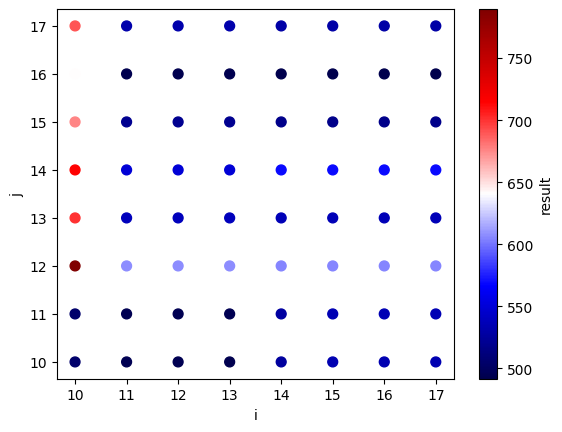

In [40]:
dt = None
dt = pd.DataFrame(columns = ['i','j', 'result'])

dfTest = df.copy()
dfTest = dfTest['2021-11-15':'2022-06-15']
loopI = [10,18,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10,18,1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ

for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)

    dfTest['STOCH_RSI']=ta.momentum.stochrsi_d(dfTest['close'], window=i, smooth1=3, smooth2=3)
    dfTest['rsi'] = ta.momentum.rsi(dfTest['close'], window=j)

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['STOCH_RSI'] < 0.1 and row['rsi'] < 30 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy at ",dfTest['close'][index]," || ", index, "coin ", coin)

      #SELL
      elif row['STOCH_RSI'] > 0.7  and row['rsi'] > 70 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        coin = 0
        #print("Sell at ",df['close'][index]," || ",index, "USDT ", usdt)


    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow
print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

In [43]:
dt = None
dt = pd.DataFrame(columns = ['wd_sto','wd_rsi', 'inf_sto', 'inf_rsi', 'sup_sto', 'sup_rsi', 'result'])

dfTest = df.copy()
dfTest = dfTest['2021-11-15':'2022-06-15']

def buyCondition(row, param_sto, param_rsi):
  if row['STOCH_RSI'] < param_sto and row['rsi'] < param_rsi:
    return True
  else:
    return False

def sellCondition(row, param_sto, param_rsi):
  if row['STOCH_RSI'] > param_sto and row['rsi'] > param_rsi:
    return True
  else:
    return False

loopI = [10,11,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [12,13,1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

loop_inf_sto = [1,20,3]
enum_inf_sto = ceil((loop_inf_sto[1] - loop_inf_sto[0]) / loop_inf_sto[2])

loop_sup_sto = [84,100,3]
enum_sup_sto = ceil((loop_sup_sto[1] - loop_sup_sto[0]) / loop_sup_sto[2])

loop_inf_rsi = [15,30,3]
enum_inf_rsi = ceil((loop_inf_rsi[1] - loop_inf_rsi[0]) / loop_inf_rsi[2])

loop_sup_rsi = [70,90,3]
enum_sup_rsi = ceil((loop_sup_rsi[1] - loop_sup_rsi[0]) / loop_sup_rsi[2])

count = 0
maxCount = enumI * enumJ * enum_inf_sto * enum_sup_sto * enum_inf_rsi * enum_sup_rsi

for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    for k in range(loop_inf_sto[0], loop_inf_sto[1], loop_inf_sto[2]):
      for l in range(loop_sup_sto[0], loop_sup_sto[1], loop_sup_sto[2]):
        for m in range(loop_inf_rsi[0], loop_inf_rsi[1], loop_inf_rsi[2]):
          for n in range(loop_sup_rsi[0], loop_sup_rsi[1], loop_sup_rsi[2]):
            clear_output(wait=True)
            count += 1
            print("Loading...",count,'/',maxCount)

            dfTest['STOCH_RSI']=ta.momentum.stochrsi_d(dfTest['close'], window=i, smooth1=3, smooth2=3)
            dfTest['rsi'] = ta.momentum.rsi(dfTest['close'], window=j)

            usdt = 1000
            coin = 0
            fee = 0.0007

            for index, row in dfTest.iterrows():
              #Buy
              if buyCondition(row, k/100, m) and  usdt > 0:
                coin = usdt / row['close'] - fee*usdt/row['close']
                usdt = 0
                #print("Buy at ",dfTest['close'][index]," || ", index, "coin ", coin)

              #SELL
              elif sellCondition(row, l/100, n) and  coin > 0:
                usdt = coin*row["close"] - fee*coin*row['close']
                coin = 0
                #print("Sell at ",df['close'][index]," || ",index, "USDT ", usdt)

            myrow = {'wd_sto': i,'wd_rsi': j, 'inf_sto': k, 'inf_rsi': m, 'sup_sto': l, 'sup_rsi': n, 'result': usdt + coin*dfTest.iloc[-1]['close']}
            dt.loc[len(dt)] = myrow

print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
plt.show()

Loading... 1470 / 1470
      wd_sto  wd_rsi  inf_sto  inf_rsi  sup_sto  sup_rsi       result
1469      10      12       19       27       99       88   403.132063
1070      10      12       16       21       84       88   403.132063
1077      10      12       16       24       84       88   403.132063
1084      10      12       16       27       84       88   403.132063
1098      10      12       16       18       87       88   403.132063
...      ...     ...      ...      ...      ...      ...          ...
651       10      12       10       24       84       70  1256.315407
434       10      12        7       21       84       70  1287.128754
224       10      12        4       21       84       70  1287.128754
441       10      12        7       24       84       70  1291.450519
231       10      12        4       24       84       70  1325.241571

[1470 rows x 7 columns]
Buy and hold result 343.53052398972136 USDT


Period : [2021-11-15 00:00:00] -> [2022-06-15 20:00:00]
Starting balance : 1000 $
Final balance : 914.14 $
Performance vs US Dollar : -8.59 %
Buy and Hold Performence : -65.65 %
Performance vs Buy and Hold : -86.92 %
Number of negative trades :  2
Number of positive trades :  4
Average Positive Trades :  4.53 %
Average Negative Trades :  -10.68 %
Best trade +7.26 %, the  2022-03-01 00:00:00
Worst trade -17.24 %, the  2022-02-04 12:00:00
Worst drawBack -17.35 %
Total fee :  8.62 $


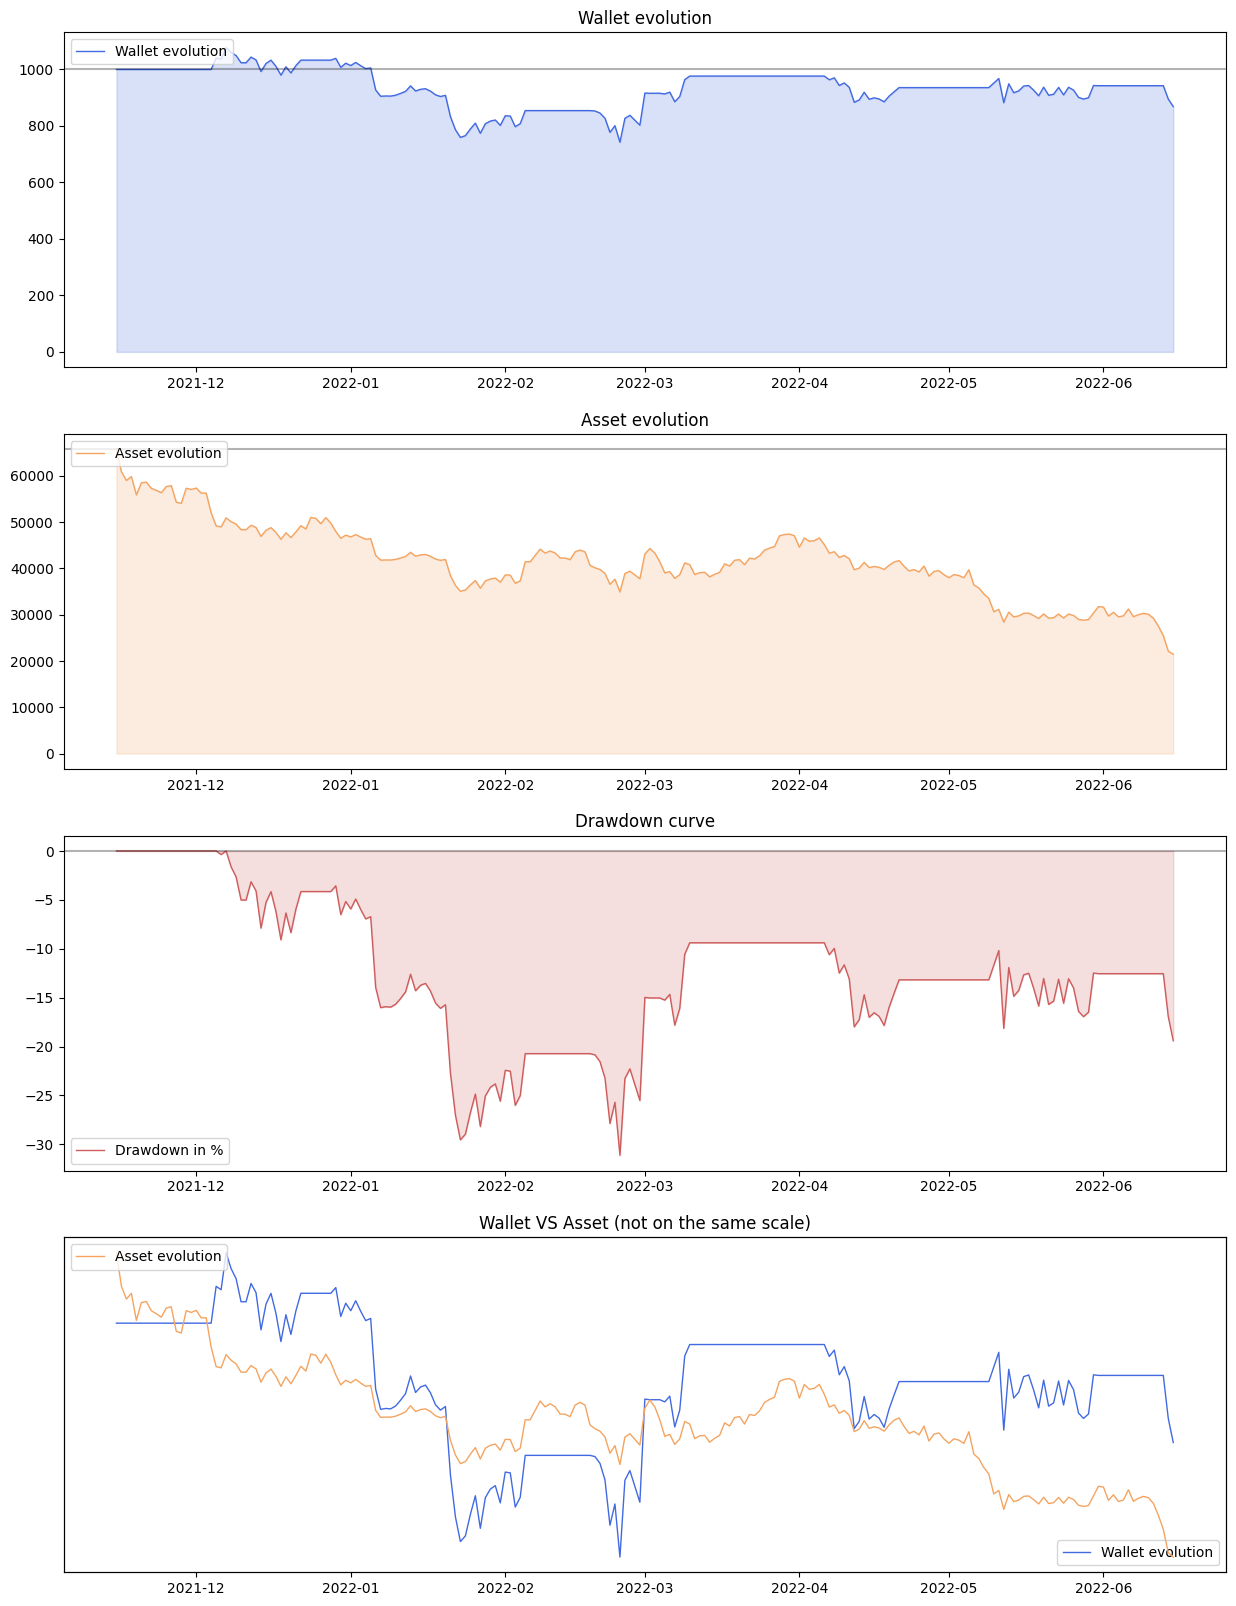

In [ ]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

dfTest = df.copy()
dfTest = dfTest['2021-11-15':'2022-06-15']
usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

dfTest['STOCH_RSI']=ta.momentum.stochrsi_d(dfTest['close'], window=10, smooth1=3, smooth2=3)
dfTest['rsi'] = ta.momentum.rsi(dfTest['close'], window=10)

def buyCondition(row, param_sto, param_rsi):
  if row['STOCH_RSI'] < param_sto and row['rsi'] < param_rsi:
    return True
  else:
    return False

def sellCondition(row, param_sto, param_rsi):
  if row['STOCH_RSI'] > param_sto and row['rsi'] > param_rsi:
    return True
  else:
    return False

for index, row in dfTest.iterrows():
    #Keep track of the evolution of our portfolio each day for later analysis
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']})
    previous_day = current_day

    #Buy
    if buyCondition(row, 0.04, 24) and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if sellCondition(row, 0.84, 70) and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    lastIndex = index

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)

dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(round(dt['drawBack'].min()*100,2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

plot_wallet_vs_asset(df_days)

#dt[['wallet','price']].plot(subplots=True, figsize=(12,10))

In [ ]:
def plot_wallet_vs_asset(df_days, log=False):
    days = df_days.copy()
    fig, ax_left = plt.subplots(figsize=(15, 20), nrows=4, ncols=1)

    ax_left[0].title.set_text("Wallet evolution")
    ax_left[0].plot(days['wallet'], color='royalblue', lw=1)
    if log:
        ax_left[0].set_yscale('log')
    ax_left[0].fill_between(days['wallet'].index, days['wallet'], alpha=0.2, color='royalblue')
    ax_left[0].axhline(y=days.iloc[0]['wallet'], color='black', alpha=0.3)
    ax_left[0].legend(['Wallet evolution'], loc ="upper left")

    ax_left[1].title.set_text("Asset evolution")
    ax_left[1].plot(days['price'], color='sandybrown', lw=1)
    if log:
        ax_left[1].set_yscale('log')
    ax_left[1].fill_between(days['price'].index, days['price'], alpha=0.2, color='sandybrown')
    ax_left[1].axhline(y=days.iloc[0]['price'], color='black', alpha=0.3)
    ax_left[1].legend(['Asset evolution'], loc ="upper left")

    ax_left[2].title.set_text("Drawdown curve")
    ax_left[2].plot(-days['drawdown_pct']*100, color='indianred', lw=1)
    ax_left[2].fill_between(days['drawdown_pct'].index, -days['drawdown_pct']*100, alpha=0.2, color='indianred')
    ax_left[2].axhline(y=0, color='black', alpha=0.3)
    ax_left[2].legend(['Drawdown in %'], loc ="lower left")

    ax_right = ax_left[3].twinx()
    if log:
        ax_left[3].set_yscale('log')
        ax_right.set_yscale('log')

    ax_left[3].title.set_text("Wallet VS Asset (not on the same scale)")
    ax_left[3].set_yticks([])
    ax_right.set_yticks([])
    ax_left[3].plot(days['wallet'], color='royalblue', lw=1)
    ax_right.plot(days['price'], color='sandybrown', lw=1)
    ax_left[3].legend(['Wallet evolution'], loc ="lower right")
    ax_right.legend(['Asset evolution'], loc ="upper left")